#### Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt


df = pd.read_csv("C:/Users/Shagun/Downloads/ab_data.csv/ab_data.csv")
df.head(20)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


Checking to see if there are any users in control that saw new page and users in treatment that saw old page

In [7]:
df.groupby(['group','landing_page']).count()

user_id  timestamp  converted
group     landing_page                               
control   new_page         1928       1928       1928
          old_page       145274     145274     145274
treatment new_page       145311     145311     145311
          old_page         1965       1965       1965

Removing control/new_page and treatment/old_page

In [8]:
df_new = df.loc[(df['group'] == 'control') & (df['landing_page'] == 'old_page') | (df['group'] == 'treatment') & (df['landing_page'] == 'new_page')]
df_new.groupby(['group','landing_page']).count()

,,user_id,timestamp,converted
group,landing_page,,,
control,old_page,145274,145274,145274
treatment,new_page,145311,145311,145311


Checking for duplicate values

In [9]:
df_new['user_id'].duplicated().sum()

1

Finding user_id for duplicate value

In [10]:
df_new[df_new.duplicated(['user_id'],keep=False)]['user_id']

1899    773192
2893    773192
Name: user_id, dtype: int64

In [11]:
df[df['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [12]:
df_new = df.drop_duplicates(subset='user_id', keep="first")

#### Exploratory Data Analysis


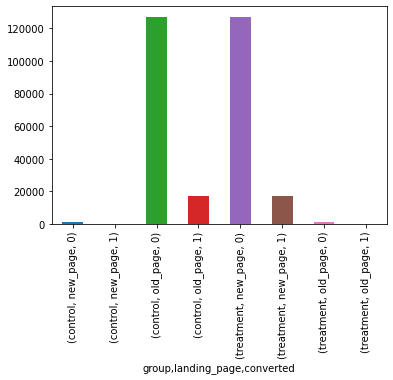

In [13]:
groups = df_new.groupby(['group','landing_page','converted']).size()
groups.plot.bar()
plt.show()

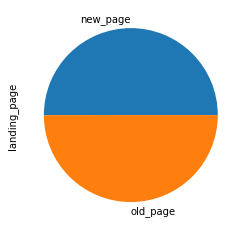

In [14]:
df_new['landing_page'].value_counts().plot.pie()
plt.show()

#### Data preparation

Re-arrrange data into 2x2 for Chi-Squared


In [15]:
#1) Split groups into two separate DataFrames
a = df_new[df_new['group'] == 'control']
b = df_new[df_new['group'] == 'treatment']

# 2) A-click, A-noclick, B-click, B-noclick
a_click = a.converted.sum()
a_noclick = a.converted.size - a.converted.sum()
b_click = b.converted.sum()
b_noclick = b.converted.size - b.converted.sum()

# 3) Create np array
T = np.array([[a_click, a_noclick], [b_click, b_noclick]])

Performing chi-squared test

In [16]:
import scipy
from scipy import stats
print(scipy.stats.chi2_contingency(T,correction=False)[1])

0.22689933216132585


In [17]:
# Sanity Check
a_CTR = a_click / (a_click + a_noclick)
b_CTR = b_click / (b_click + b_noclick)
print(a_CTR, b_CTR)

0.12029717968491792 0.11884253398646046
